# Model Bulding on KNN Data Set with outlier treated

In [81]:
import pandas as pd 
import numpy as np 
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

In [82]:
df = pd.read_csv('US_Heart_Patients.csv')

In [83]:
df_knn_o = df.copy()

In [21]:
df_knn_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  heart_attack     4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [27]:
df_knn_o.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
heart_attack       0
dtype: int64

In [47]:
for column in ['education', 'BPMeds']:
    df_knn_o[column].fillna(df[column].mode()[0],inplace=True)

In [48]:
df_knn_o.drop(['diaBP','prevalentHyp','currentSmoker'],axis=1,inplace=True)

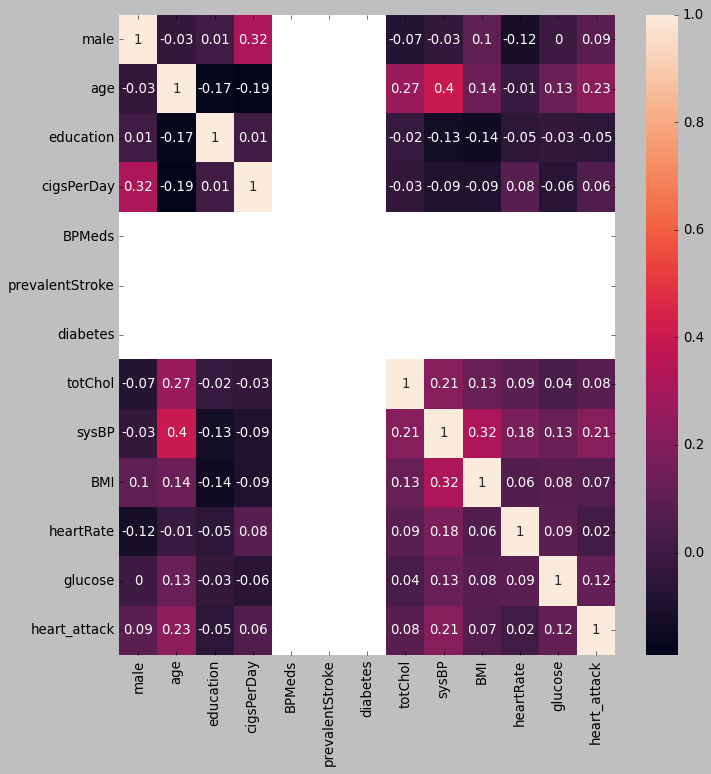

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(round(df_knn_o.corr(),2),annot=True)
plt.show()

In [50]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed=imputer.fit_transform(df_knn_o)
df_knn_o = pd.DataFrame(data = df_imputed,columns=df_knn_o.columns)

In [51]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range =Q1-(1.5*IQR)
    upper_range =Q3+(1.5*IQR)
    return lower_range,upper_range

In [52]:
for column in df_knn_o.drop(['glucose','heart_attack'],axis=1).columns:
    
    lr,ur=remove_outlier(df_knn_o[column])
    
    df_knn_o[column] = np.where(df_knn_o[column]>ur,ur,df_knn_o[column])
    
    df_knn_o[column] = np.where(df_knn_o[column]<lr,lr,df_knn_o[column])
    


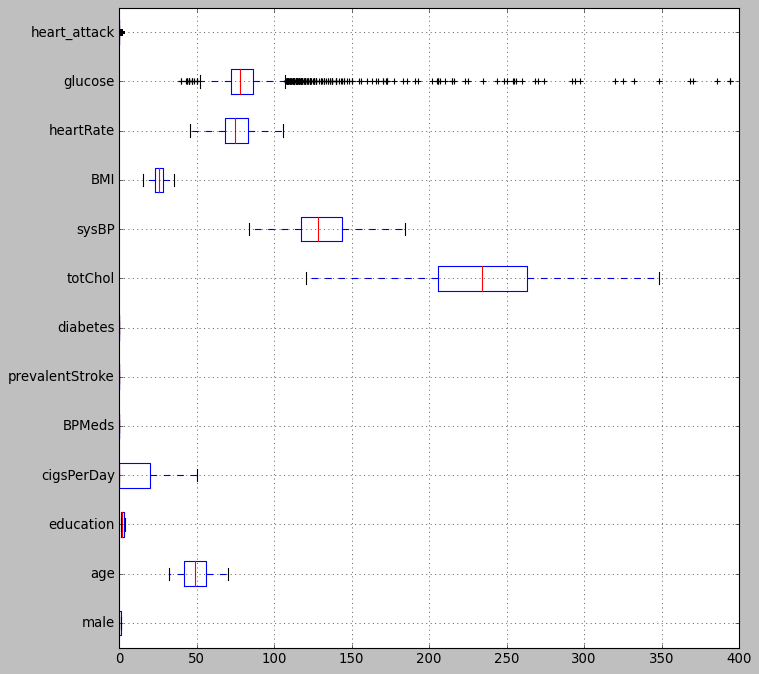

In [54]:
plt.figure(figsize=(10,10))
df_knn_o.boxplot(vert=0)
plt.show()

In [55]:
X = df_knn_o.drop('heart_attack',axis=1)
y = df_knn_o['heart_attack']

#Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [63]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [64]:
from sklearn import tree

DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X_train,y_train)


DecisionTreeClassifier()

In [59]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier(random_state=1)
GB_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [65]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train)

In [66]:
ADB_model_s = AdaBoostClassifier()

In [67]:
GB_model_s = GradientBoostingClassifier()

In [68]:
ADB_model_s.fit(X_train_s,y_train_s)

AdaBoostClassifier()

In [69]:
GB_model_s.fit(X_train_s,y_train_s)

GradientBoostingClassifier()

In [70]:
def get_metrics_score(model,flag=True):
    '''
    
    model : Classifier to predict values in X
    
    '''
    
    score_list=[]
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc =model.score(X_train,y_train)
    test_acc =model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
    
    if flag == True:
        
        print("Accuracy on training set : ", model.score(X_train,y_train))
        print("Accuracy on test set : ", model.score(X_test,y_test))
        print("Recall on Training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    
    
    return score_list
    
    

In [71]:
models = [DT_model, ADB_model, GB_model, KNN_model, NB_model, RF_model,ADB_model_s,GB_model_s]

# defining empty list to add train and test data results

acc_train=[]
acc_test=[]
recall_train=[]
recall_test=[]
precision_train=[]
precision_test=[]

# looping through all the models to get tge acuracy, recall and precision scores

for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    
comparison_frame = pd.DataFrame({'Model' : ['DT_model_Knno', 'ADB_model_knno', 'GB_model_knno',
                                            'KNN_model_knno', 'NB_model_knno', 'RF_model_knno',
                                            'ADb_model_s_knno', 'GB_model_s_knno'],
                                'Train_accuracy ' : acc_train,'Test_accuracy': acc_test,
                                'Train_Recall' : recall_train,'Test_Recall' :recall_test,
                                'Train_Precision' : precision_train,'Test_Precision':precision_test})
comparison_frame    

,Model,Train_accuracy,Test_accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,DT_model_Knno,1.00,0.76,1.00,0.24,1.00,0.22
1,ADB_model_knno,0.86,0.85,0.14,0.06,0.72,0.39
2,GB_model_knno,0.88,0.85,0.23,0.08,0.95,0.44
3,KNN_model_knno,0.87,0.84,0.23,0.10,0.76,0.35
4,NB_model_knno,0.83,0.85,0.15,0.18,0.36,0.46
5,RF_model_knno,1.00,0.85,1.00,0.05,1.00,0.50
6,ADb_model_s_knno,0.80,0.78,0.38,0.27,0.36,0.26
7,GB_model_s_knno,0.86,0.82,0.36,0.19,0.55,0.30


In [87]:
df_knn_o = df_knn_o.to_csv('df_knn_o.csv')

In [86]:
df_knn_o

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,heart_attack
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
